In [119]:
from flight_dataset import *
from datamodule import * 
from file_parsing_utils import * 
from model import * 
from coordinate_transform import *

from copy import deepcopy
from math import radians, sin, cos, sqrt, atan2

from glob import glob


import numpy as np
import pandas as pd
from scipy.interpolate import interp1d


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.ndimage as ndimage

In [2]:
def compose_rd_dataframe(rd_filepaths_list):
    """
    Read in rd files and concatinate them
    return combined rd file 
    """

    rd_list = [d["RD"] for d in files_dict.values()]
    #dataframes_list = [pd.read_csv(filepath_rd, usecols=["Msn", "Orig", "EstOrig", "Dest", "EstDest"]) for filepath_rd in rd_list]
    dataframes_list = [pd.read_csv(filepath_rd) for filepath_rd in rd_list]
    rd_dataframe = pd.concat(dataframes_list, axis=0, ignore_index=True)
    return rd_dataframe
    
dir_csv = '/Users/aleksandranikevich/Desktop/AircraftTrajectory/data/data_gz/'
files_dict = group_files_by_type(dir_csv)

rd_dataframe = compose_rd_dataframe(files_dict)
rd_dataframe

,lKey,cKey,SysName,StartDate,StartTime,tMidnightSecs,tStartSecs,tStopSecs,tStart,tStop,...,Centers,TRACONs,Sectors,SUAs,SpAirsp,LclAirsp,NavObjs,ClssAirsp,equipList,RDVersion
0,16884,USA_20240518_050248_16884,usa,05/18/2024,04:53:10,1.715990e+09,1.716008e+09,1.716009e+09,17589.526,18168.306,...,OUTSIDE,NONE,OUTSIDE,NONE,NONE,NONE,NONE,NONE,?,2
1,16900,USA_20240518_050620_16900,usa,05/18/2024,04:58:55,1.715990e+09,1.716008e+09,1.716009e+09,17935.395,18379.997,...,OUTSIDE,NONE,OUTSIDE,NONE,NONE,NONE,NONE,NONE,?,2
2,16911,USA_20240518_052142_16911,usa,05/18/2024,05:14:18,1.715990e+09,1.716009e+09,1.716010e+09,18858.189,19302.358,...,OUTSIDE,NONE,OUTSIDE,NONE,NONE,NONE,NONE,NONE,?,2
3,17008,USA_20240518_050018_17008,usa,05/18/2024,04:33:42,1.715990e+09,1.716007e+09,1.716008e+09,16422.112,18017.899,...,OUTSIDE,NONE,OKA@ZFW,NONE,NONE,NONE,NONE,NONE,?,2
4,17031,USA_20240518_051326_17031,usa,05/18/2024,05:09:38,1.715990e+09,1.716009e+09,1.716009e+09,18577.843,18805.972,...,OUTSIDE,NONE,MMM@ZMP,NONE,NONE,NONE,NONE,NONE,?,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234221,112797,USA_20240517_040315_112797,usa,05/17/2024,02:43:15,1.715904e+09,1.715914e+09,1.715919e+09,9795.000,14594.965,...,OUTSIDE|ZMP@ZMP|ZAU@ZAU|OUTSIDE,NONE,MMM@ZMP|21@ZMP|15@ZMP|76@ZAU|94@ZAU|83@ZAU|47@...,NONE,NONE,NONE,NONE,NONE,1H/L,2
234222,112801,USA_20240517_035445_112801,usa,05/17/2024,03:29:15,1.715904e+09,1.715917e+09,1.715918e+09,12555.000,14085.000,...,OUTSIDE,NONE,OUTSIDE,NONE,NONE,NONE,NONE,NONE,F/,2
234223,113120,USA_20240517_040749_113120,usa,05/17/2024,01:13:59,1.715904e+09,1.715908e+09,1.715919e+09,4439.000,14869.000,...,OUTSIDE|ZMA@ZMA|ZJX@ZJX|ZDC@ZDC|ZNY@ZNY|OUTSIDE,NONE,OUTSIDE|60@ZMA|59@ZMA|19@ZMA|35@ZJX|52@ZJX|NVF...,NONE,NONE,NONE,NONE,NONE,/L,2
234224,113161,USA_20240517_045504_113161,usa,05/17/2024,04:53:16,1.715904e+09,1.715922e+09,1.715922e+09,17596.223,17704.269,...,ZAB@ZAB,NONE,42@ZAB,NONE,NONE,NONE,NONE,NONE,?,2


In [5]:
list(rd_dataframe.columns.values)


['lKey',
 'cKey',
 'SysName',
 'StartDate',
 'StartTime',
 'tMidnightSecs',
 'tStartSecs',
 'tStopSecs',
 'tStart',
 'tStop',
 'Duration',
 'Msn',
 'AcId',
 'AcType',
 'FltIdx',
 'PC',
 'WC',
 'Cid',
 'Bcn',
 'OT',
 'Airline',
 'CT',
 'Orig',
 'EstOrig',
 'TOFRwy',
 'Dest',
 'EstDest',
 'LNDRwy',
 'tTOC',
 'tTOD',
 'FFXName',
 'FFXDist',
 'tFFX',
 'ATAThdDep',
 'ATACtrDep',
 'ATAOutDep',
 'ATACtrArr',
 'ATATcnArr',
 'ATAThdArr',
 'ETAThdArrO',
 'ETAThdArrI',
 'tOAGDep',
 'tOAGArr',
 'tOUT',
 'tTAXI',
 'tOFF',
 'tON',
 'tIN',
 'FacName',
 'Field10',
 'Systems',
 'FIRs',
 'Centers',
 'TRACONs',
 'Sectors',
 'SUAs',
 'SpAirsp',
 'LclAirsp',
 'NavObjs',
 'ClssAirsp',
 'equipList',
 'RDVersion']

In [ ]:
#  'Dest',
#  'EstDest',
#  'Orig',
#  'EstOrig',

In [12]:
rd_dataframe_relevent = rd_dataframe[['Msn', 'lKey', 'cKey', 'Dest', 'EstDest', 'Orig', 'EstOrig']]
rd_dataframe_relevent

,Msn,lKey,cKey,Dest,EstDest,Orig,EstOrig
0,34088,16884,USA_20240518_050248_16884,?,?,?,?
1,34104,16900,USA_20240518_050620_16900,?,?,?,?
2,34115,16911,USA_20240518_052142_16911,?,?,?,?
3,34212,17008,USA_20240518_050018_17008,?,OUN,?,?
4,34235,17031,USA_20240518_051326_17031,?,ANE,?,?
...,...,...,...,...,...,...,...
234221,226731,112797,USA_20240517_040315_112797,KIND,IND,KMSP,MSP
234222,226735,112801,USA_20240517_035445_112801,?,HNL,?,?
234223,228102,113120,USA_20240517_040749_113120,KJFK,JFK,ILM161067,?
234224,228143,113161,USA_20240517_045504_113161,?,?,?,?


In [15]:
#rd_dataframe[['Dest', 'EstDest', 'Orig', 'EstOrig']].iloc[0]['Dest']
rd_dataframe['Dest'].unique()

array(['?', 'ANC', 'EGSS', ..., 'KTKC', 'DRS', 'LLU'], dtype=object)

In [17]:
import pandas as pd

def create_filtered_rd_dataframe(df, bool_dest, bool_est_dest, bool_orig, bool_est_orig):
    if bool_dest:
        df = df[df['Dest'] != '?']
    if bool_est_dest:
        df = df[df['EstDest'] != '?']
    if bool_orig:
        df = df[df['Orig'] != '?']
    if bool_est_orig:
        df = df[df['EstOrig'] != '?']
    return df


def filter_rd_dataframe(df, dest=None, est_dest=None, orig=None, est_orig=None):
    if dest is not None:
        df = df[df['Dest'] == dest]
    if est_dest is not None:
        df = df[df['EstDest'] == est_dest]
    if orig is not None:
        df = df[df['Orig'] == orig]
    if est_orig is not None:
        df = df[df['EstOrig'] == est_orig]
    return df




In [19]:
unique_counts = rd_dataframe['Dest'].value_counts().reset_index()
unique_counts.columns = ['UniqueValue', 'Count']

# Sort by the count in descending order
unique_counts = unique_counts.sort_values(by='Count', ascending=False)

print(unique_counts)

     UniqueValue  Count
0              ?  63103
1     unassigned  15579
2           KATL   3368
3           KORD   3339
4           KDFW   2975
...          ...    ...
4457        KMKN      1
4456         8A7      1
4455         MMS      1
4454         EEE      1
5475         LLU      1

[5476 rows x 2 columns]


In [22]:
common_flightpath_pd = filter_rd_dataframe(df=rd_dataframe_relevent, dest='KATL', est_dest=None, orig='KDFW', est_orig=None) 
common_flightpath_pd

,Msn,lKey,cKey,Dest,EstDest,Orig,EstOrig
10434,61118,30051,USA_20240518_142152_30051,KATL,ATL,KDFW,DFW
59796,160224,79703,USA_20240519_022548_79703,KATL,ATL,KDFW,DFW
76664,68627,34126,USA_20240517_134618_34126,KATL,ATL,KDFW,DFW
77896,71166,35365,USA_20240517_140226_35365,KATL,ATL,KDFW,DFW
86435,88529,43950,USA_20240517_155714_43950,KATL,ATL,KDFW,DFW
87857,91391,45383,USA_20240517_161405_45383,KATL,ATL,KDFW,DFW
89519,94843,47057,USA_20240517_161910_47057,KATL,ATL,KDFW,DFW
106812,130254,64480,USA_20240517_182834_64480,KATL,ATL,KDFW,DFW
113737,143498,71465,USA_20240517_204608_71465,KATL,ATL,KDFW,DFW
124015,164263,81836,USA_20240517_223728_81836,KATL,ATL,KDFW,DFW


In [27]:
individual_flights_dir = "/Users/aleksandranikevich/Desktop/AircraftTrajectory/data/Individual_Flights/"

os.listdir(individual_flights_dir + str(common_flightpath_pd['Msn'].iloc[1]))

['DAL2399']

In [28]:
os.listdir(individual_flights_dir + str(common_flightpath_pd['Msn'].iloc[2]))

['DAL893']

In [85]:
flight_df_1 = pd.read_csv(glob(individual_flights_dir + str(common_flightpath_pd['Msn'].iloc[2]) +  '/DAL893/*.csv')[0]).sort_values(by='Time')
flight_df_1
#flight_df_2 = pd.read_csv(flight_df)

,Unnamed: 0,fltKey,CID,UAID,Time,Latitude,Longitude,Altitude,PointSource,RecTypeCat,Significance,GroundSpeed,FlightCourse
0,71245693,68627,778,DAL893,1715947300,32.88986,-97.03443,5.69,0xE02,1,1,1,0
1,71245694,68627,778,DAL893,1715947303,32.88988,-97.03443,5.69,0xE02,1,1,1,0
2,71245695,68627,778,DAL893,1715947305,32.88992,-97.03439,5.69,0xE02,1,1,6,40
3,71245696,68627,778,DAL893,1715947306,32.88995,-97.03440,5.69,0xE02,1,1,7,344
4,71245697,68627,778,DAL893,1715947308,32.88997,-97.03439,5.69,0xE02,1,1,2,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,71247176,68627,778,DAL893,1715953573,33.63859,-84.44049,10.06,0xE02,1,1,6,0
1484,71247177,68627,778,DAL893,1715953574,33.63861,-84.44051,10.06,0xE02,1,1,6,320
1485,71247178,68627,778,DAL893,1715953575,33.63864,-84.44052,10.06,0xE02,1,1,7,344
1486,71247179,68627,778,DAL893,1715953576,33.63865,-84.44053,10.06,0xE02,1,10,3,320


In [86]:
flight_df_2 = pd.read_csv(glob(individual_flights_dir + str(common_flightpath_pd['Msn'].iloc[1]) +  '/DAL2399/*.csv')[0]).sort_values(by='Time')
flight_df_2

,Unnamed: 0,fltKey,CID,UAID,Time,Latitude,Longitude,Altitude,PointSource,RecTypeCat,Significance,GroundSpeed,FlightCourse
0,168589910,160224,776,DAL2399,1716078388,32.89004,-97.03435,5.69,0xE02,1,1,0,148
1,168589911,160224,776,DAL2399,1716078685,32.89000,-97.03432,5.69,0xE02,1,1,0,148
2,168589912,160224,776,DAL2399,1716078686,32.88997,-97.03433,5.69,0xE02,1,1,7,196
3,168589913,160224,776,DAL2399,1716078687,32.88997,-97.03435,5.69,0xE02,1,5,4,273
4,168589914,160224,776,DAL2399,1716078688,32.88998,-97.03439,5.69,0xE02,1,1,8,287
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,168591609,160224,776,DAL2399,1716085544,33.64232,-84.44053,10.06,0xE02,1,3,7,196
1700,168591610,160224,776,DAL2399,1716085545,33.64229,-84.44053,10.06,0xE02,1,3,6,180
1701,168591611,160224,776,DAL2399,1716085546,33.64226,-84.44054,10.06,0xE02,1,1,7,196
1702,168591612,160224,776,DAL2399,1716085547,33.64222,-84.44051,10.06,0xE02,1,1,10,148


In [87]:
flightpath_compleate_1 = flight_df_1[["Latitude", "Longitude"]].to_numpy()
flightpath_compleate_2 = flight_df_2[["Latitude", "Longitude"]].to_numpy()
flightpath_compleate_1.shape, flightpath_compleate_2.shape

((1488, 2), (1704, 2))

In [88]:
min_lat, max_lat = np.min(flightpath_compleate_1[:, 0]), np.max(flightpath_compleate_1[:, 0])
min_long, max_long = np.min(flightpath_compleate_1[:, 1]), np.max(flightpath_compleate_1[:, 1])

m = create_folium_map(min_lat, min_long, max_lat, max_long, border_lat_prop=0.15, border_long_prop=0.15, tiles=None) #"Cartodb dark_matter")
folium.PolyLine(locations=flightpath_compleate_1, color='black', weight=2.5, opacity=1).add_to(m)
folium.PolyLine(locations=flightpath_compleate_2, color='black', weight=2.5, opacity=1).add_to(m)
m

In [90]:
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw


# # Calculate DTW distance
distance, path = fastdtw(flightpath_compleate_1, flightpath_compleate_2, dist=euclidean)
print(f'DTW distance: {distance}')


DTW distance: 125.75654387896635


In [91]:
path

[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 4),
 (6, 4),
 (7, 4),
 (8, 5),
 (9, 6),
 (10, 7),
 (11, 8),
 (12, 9),
 (13, 10),
 (14, 11),
 (15, 12),
 (16, 13),
 (17, 14),
 (18, 15),
 (19, 16),
 (20, 17),
 (21, 18),
 (22, 19),
 (23, 20),
 (24, 21),
 (25, 22),
 (26, 23),
 (27, 24),
 (28, 25),
 (29, 26),
 (30, 27),
 (31, 28),
 (32, 29),
 (33, 30),
 (34, 31),
 (35, 32),
 (36, 33),
 (37, 34),
 (38, 35),
 (39, 36),
 (40, 37),
 (41, 38),
 (42, 39),
 (43, 40),
 (44, 41),
 (45, 42),
 (46, 43),
 (47, 44),
 (48, 45),
 (49, 46),
 (50, 47),
 (51, 48),
 (52, 49),
 (53, 50),
 (54, 51),
 (55, 52),
 (56, 53),
 (57, 54),
 (58, 55),
 (59, 56),
 (60, 57),
 (61, 58),
 (62, 59),
 (63, 60),
 (64, 61),
 (65, 62),
 (66, 63),
 (67, 64),
 (68, 65),
 (69, 66),
 (70, 67),
 (71, 68),
 (72, 69),
 (73, 70),
 (74, 70),
 (75, 70),
 (76, 70),
 (77, 70),
 (78, 70),
 (79, 70),
 (80, 70),
 (81, 70),
 (82, 71),
 (83, 71),
 (84, 71),
 (85, 71),
 (86, 71),
 (87, 71),
 (88, 71),
 (89, 71),
 (90, 71),
 (91, 71),
 (92, 71),


In [123]:
def png_path_to_fig(image_path, main_title=None, num_rows=None, num_cols=None):
    # Read the image
    img = mpimg.imread(image_path)
    
    # Get the dimensions of the image
    height, width, _ = img.shape
    
    # Convert dimensions from pixels to inches (assuming 100 DPI)
    dpi = 100
    fig_width = width / dpi
    fig_height = height / dpi
    
    # Check if num_rows and num_cols are specified
    if num_rows is not None and num_cols is not None:
        # Create a figure with the specified number of subplots
        fig, axs = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height), dpi=dpi)
        
        # Flatten the axs array if it's 2D for easier indexing
        if num_rows > 1 or num_cols > 1:
            axs = axs.flatten()
        
        # Display the image in the first subplot
        axs[0].imshow(img)
        axs[0].axis('off')
        
        # Add a main title if provided
        if main_title is not None:
            fig.suptitle(main_title)
        
        return fig, axs
    else:
        # Create a figure with the same size as the image
        fig, ax = plt.subplots(figsize=(fig_width, fig_height), dpi=dpi)
        
        # Display the image
        ax.imshow(img)
        ax.axis('off')
        
        # Add a main title if provided
        if main_title is not None:
            fig.suptitle(main_title)
        
        return fig, ax

In [83]:
def mae_2_flights(resampled_df1, resampled_df2):
    # Calculating MAE
    mae_lat = np.mean(np.abs(resampled_df1['Latitude'] - resampled_df2['Latitude']))
    mae_long = np.mean(np.abs(resampled_df1['long'] - resampled_df2['long']))
    return mae_lat, mae_long

def error_over_flightpaths(resampled_df1, resampled_df2):
    num_rows, num_cols = resampled_df1.shape
    absolute_distance_errro_arr = []
    mse_error_arr = []
    for i in range(num_rows):
        lat1 = resampled_df1['Latitude'].iloc[i]
        long1 = resampled_df1['Longitude'].iloc[i]
        lat2 = resampled_df2['Latitude'].iloc[i]
        long2 = resampled_df2['Longitude'].iloc[i]

        distance = haversine(lat1, long1, lat2, long2)
        absolute_distance_errro_arr.append(distance)
        mse_error_arr.append(0.5* (lat1 - lat2)**2 + (long1 - long2)**2)

    return absolute_distance_errro_arr, mse_error_arr


# def interpolate_flightpaths(df1, df2, num_timestamps = 1000):
#     df1['Time'] = (df1['Time'] - df1['Time'][0])/df1['Time'].iloc[-1]
#     df2['Time'] = (df2['Time'] - df2['Time'][0])/df2['Time'].iloc[-1]

#     timestamps = np.linspace(0, 1.0, num_timestamps)

#     # Interpolation
#     interp1_lat = interp1d(df1['Time'], df1['Latitude'], kind='linear')
#     interp1_long = interp1d(df1['Time'], df1['Longitude'], kind='linear')
#     interp2_lat = interp1d(df2['Time'], df2['Latitude'], kind='linear')
#     interp2_long = interp1d(df2['Time'], df2['Longitude'], kind='linear')

#     #print("debug: ", timestamps.shape, interp1_lat.shape, interp1_long.shape, interp2_lat.shape, interp2_long.shape)

#     resampled_df1 = pd.DataFrame({'timestamp': timestamps, 'Latitude': interp1_lat(timestamps), 'Longitude': interp1_long(timestamps)})
#     resampled_df2 = pd.DataFrame({'timestamp': timestamps, 'Latitude': interp2_lat(timestamps), 'Longitude': interp2_long(timestamps)})

#     return resampled_df1, resampled_df2

# resampled_df1, resampled_df2 = interpolate_flightpaths(df1=flight_df_1, df2=flight_df_2, num_timestamps = 1000)


import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

def interpolate_flightpaths(df1, df2, num_timestamps=1000):
    df1 = df1.sort_values(by='Time')
    df2 = df2.sort_values(by='Time')

    df1['Time'] = (df1['Time'] - df1['Time'][0]) / df1['Time'].iloc[-1]
    df2['Time'] = (df2['Time'] - df2['Time'][0]) / df2['Time'].iloc[-1]

    min_time = 0.0
    max_time = 1.0
    # min_time = max(df1['Time'].min(), df2['Time'].min())
    # max_time = min(df1['Time'].max(), df2['Time'].max())
    timestamps = np.linspace(min_time, max_time, num_timestamps)

    # Interpolation
    interp1_lat = interp1d(df1['Time'], df1['Latitude'], kind='linear')
    interp1_long = interp1d(df1['Time'], df1['Longitude'], kind='linear')
    interp2_lat = interp1d(df2['Time'], df2['Latitude'], kind='linear')
    interp2_long = interp1d(df2['Time'], df2['Longitude'], kind='linear')

    resampled_df1 = pd.DataFrame({'timestamp': timestamps, 'Latitude': interp1_lat(timestamps), 'Longitude': interp1_long(timestamps)})
    resampled_df2 = pd.DataFrame({'timestamp': timestamps, 'Latitude': interp2_lat(timestamps), 'Longitude': interp2_long(timestamps)})

    return resampled_df1, resampled_df2


resampled_df1, resampled_df2 = interpolate_flightpaths(df1=flight_df_1, df2=flight_df_2, num_timestamps=1000)


In [231]:
resampled_df1_ = resampled_df1[["Latitude", "Longitude"]].to_numpy()
resampled_df2_ = resampled_df2[["Latitude", "Longitude"]].to_numpy()



min_lat, max_lat = np.min(resampled_df1_[:, 0]), np.max(resampled_df1_[:, 0])
min_long, max_long = np.min(flightpath_compleate_1[:, 1]), np.max(resampled_df2_[:, 1])

m = create_folium_map(min_lat, min_long, max_lat, max_long, border_lat_prop=0.05, border_long_prop=0.05, tiles=None) #"Cartodb dark_matter")
folium.PolyLine(locations=flightpath_compleate_1, color='black', weight=2.5, opacity=1).add_to(m)
folium.PolyLine(locations=flightpath_compleate_2, color='grey', weight=2.5, opacity=1).add_to(m)



num_rows, num_cols = resampled_df1.shape
absolute_distance_errro_arr = []
mse_error_arr = []
for i in range(0, num_rows, 15):
    lat1 = resampled_df1['Latitude'].iloc[i]
    long1 = resampled_df1['Longitude'].iloc[i]
    lat2 = resampled_df2['Latitude'].iloc[i]
    long2 = resampled_df2['Longitude'].iloc[i]

    distance = haversine(lat1, long1, lat2, long2)
    absolute_distance_errro_arr.append(distance)
    mse_error_arr.append(0.5* (lat1 - lat2)**2 + (long1 - long2)**2)

    np_line = np.array([[lat1, long1], [lat2, long2]])
    folium.PolyLine(locations=np_line, color='red', weight=2.5, opacity=1).add_to(m)

m

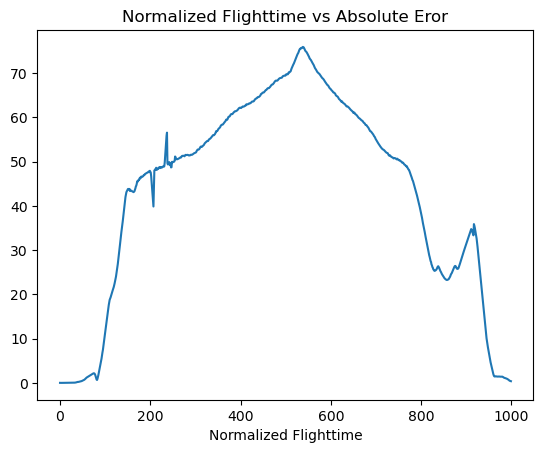

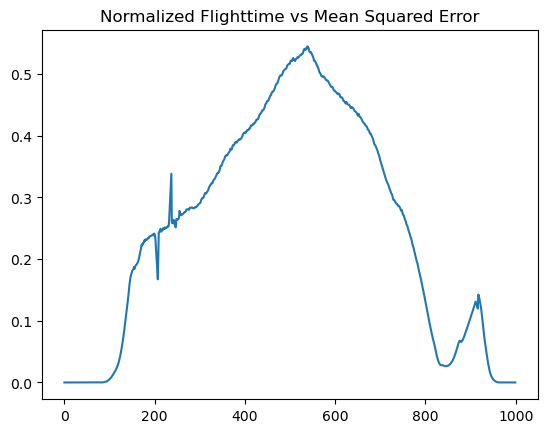

In [232]:
mae_error_arr, mse_error_arr = error_over_flightpaths(resampled_df1, resampled_df2)

plt.figure()
plt.title("Normalized Flighttime vs Absolute Eror")
plt.xlabel("Normalized Flighttime")
plt.ylabel("")
plt.plot(mae_error_arr)
plt.figure()
plt.title("Normalized Flighttime vs Mean Squared Error")
plt.plot(mse_error_arr)

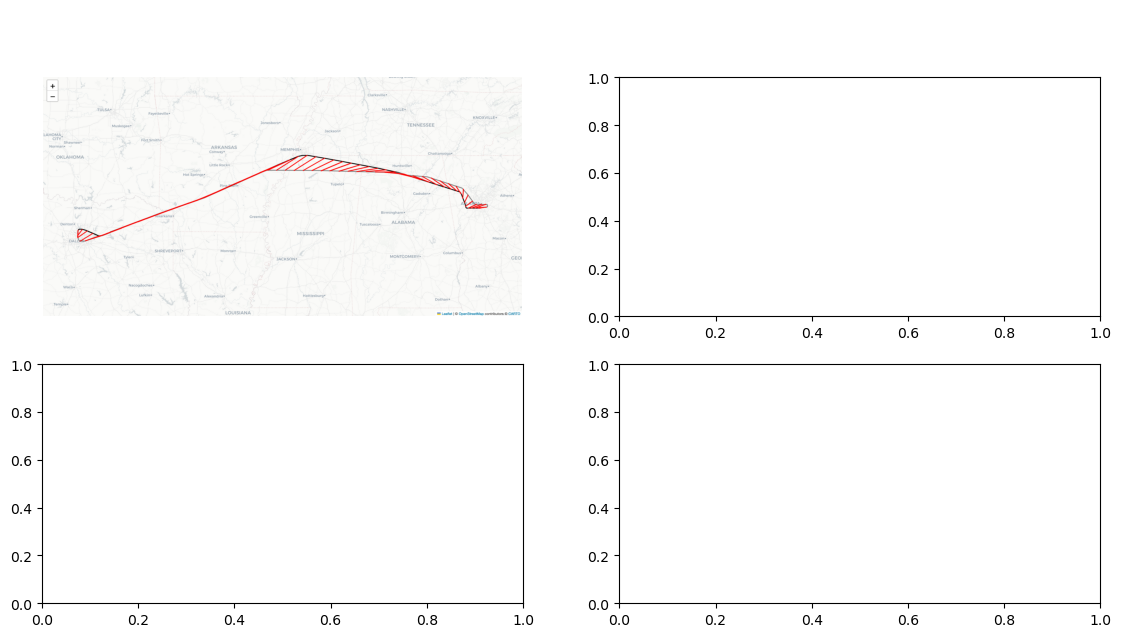

In [233]:
html_map_path, png_map_path = get_map_image(m, file_base = None, save_map_name = str(100), firefox_dir = None, firefox_binary = None)

fig, ax = png_path_to_fig(png_map_path, main_title=" ", num_rows=2, num_cols=2) 

In [234]:

def zoom_to_bounds(m, lat1, long1, lat2, long2):
    """
    Zoom the folium map object to the specified bounds.
    
    params:
        m: folium.Map: The folium map object
        lat1: float: latitude_1
        long1: float: longitude_1
        lat2: float: latitude_2
        long2: float: longitude_2
    """
    lat1, lat2 = min(lat1, lat2), max(lat1, lat2)
    long1, long2 = min(long1, long2), max(long1, long2)
    
    # Fit the map to the specified bounds
    m.fit_bounds([[lat1, long1], [lat2, long2]])
    
    # Manually set the zoom level and center
    m.location = [(lat1 + lat2) / 2, (long1 + long2) / 2]
    m.zoom_start = 10  # Adjust the zoom level as needed
    return m



keys_to_delete = [key for key, elem in m._children.items() if isinstance(elem, folium.map.FitBounds)]
for key in keys_to_delete:
    del m._children[key]
        


# min_lat, max_lat = np.min(resampled_df1_[:, 0]), np.max(resampled_df1_[:, 0])
# min_long, max_long = np.min(flightpath_compleate_1[:, 1]), np.max(resampled_df2_[:, 1])

# d_lat = np.abs(max_lat - min_lat)
# d_long = np.abs(max_long - min_long)
lat1, long1 = 33.109030, -97.163464
lat2, long2 = 32.652788, -96.376673

#m.fit_bounds([[lat1, long1 + 0.02], [lat2, long2 + 0.12]])
m = zoom_to_bounds(m, lat1, long1, lat2, long2)
m
#d_lat, d_long

In [235]:
m._children

OrderedDict([('cartodbpositron',
              <folium.raster_layers.TileLayer at 0x34c5aaba0>),
             ('poly_line_50711dc7f3cacbb2a135907f9e241c60',
              <folium.vector_layers.PolyLine at 0x34dc710a0>),
             ('poly_line_3eebdd346dd683da6910df889a8da4a3',
              <folium.vector_layers.PolyLine at 0x34d980380>),
             ('poly_line_e9ea4dc1d6643676dac013f9e01c5ad3',
              <folium.vector_layers.PolyLine at 0x1735cab40>),
             ('poly_line_bdf24e173e2e944031fe6a9c117ddff8',
              <folium.vector_layers.PolyLine at 0x34dc73bc0>),
             ('poly_line_871896afc96f19194d5c1c911a6d1c76',
              <folium.vector_layers.PolyLine at 0x34b199a90>),
             ('poly_line_17de64a2dcf118f10afc7d8831c16b7e',
              <folium.vector_layers.PolyLine at 0x34aff2630>),
             ('poly_line_386b208f29dac7916447d52c11692610',
              <folium.vector_layers.PolyLine at 0x34d980ef0>),
             ('poly_line_803eec95f97818ba5

In [236]:
for key, elem in m._children.items():
    print(key, elem) # isinstance(elem, folium.map.FitBounds)

cartodbpositron <folium.raster_layers.TileLayer object at 0x34c5aaba0>
poly_line_50711dc7f3cacbb2a135907f9e241c60 <folium.vector_layers.PolyLine object at 0x34dc710a0>
poly_line_3eebdd346dd683da6910df889a8da4a3 <folium.vector_layers.PolyLine object at 0x34d980380>
poly_line_e9ea4dc1d6643676dac013f9e01c5ad3 <folium.vector_layers.PolyLine object at 0x1735cab40>
poly_line_bdf24e173e2e944031fe6a9c117ddff8 <folium.vector_layers.PolyLine object at 0x34dc73bc0>
poly_line_871896afc96f19194d5c1c911a6d1c76 <folium.vector_layers.PolyLine object at 0x34b199a90>
poly_line_17de64a2dcf118f10afc7d8831c16b7e <folium.vector_layers.PolyLine object at 0x34aff2630>
poly_line_386b208f29dac7916447d52c11692610 <folium.vector_layers.PolyLine object at 0x34d980ef0>
poly_line_803eec95f97818ba551e6388e8bc60ed <folium.vector_layers.PolyLine object at 0x34aff2ff0>
poly_line_36b8ef316240dcd2dd327f042d072c3c <folium.vector_layers.PolyLine object at 0x34d982f00>
poly_line_5e779b175549f895083b92bcd3ed2e05 <folium.vecto

In [237]:
isinstance(elem, folium.map.FitBounds)

True

In [238]:
# def png_path_to_fig(image_path, main_title=None, num_rows=None, num_cols=None):
#     # Read the image
#     img = mpimg.imread(image_path)

html_map_path, png_map_path = get_map_image(m, file_base = None, save_map_name = str(100), firefox_dir = None, firefox_binary = None)

#fig, ax = png_path_to_fig(png_map_path, main_title=" ", num_rows=2, num_cols=2) 
img_zoomed = mpimg.imread(png_map_path)
img_zoomed

array([[[0.9137255 , 0.84313726, 0.84705883, 1.        ],
        [0.88235295, 0.77254903, 0.78039217, 1.        ],
        [0.9098039 , 0.8352941 , 0.8352941 , 1.        ],
        ...,
        [0.98039216, 0.98039216, 0.972549  , 1.        ],
        [0.98039216, 0.98039216, 0.972549  , 1.        ],
        [0.98039216, 0.98039216, 0.972549  , 1.        ]],

       [[0.98039216, 0.98039216, 0.972549  , 1.        ],
        [0.98039216, 0.98039216, 0.972549  , 1.        ],
        [0.98039216, 0.98039216, 0.972549  , 1.        ],
        ...,
        [0.98039216, 0.98039216, 0.972549  , 1.        ],
        [0.98039216, 0.98039216, 0.972549  , 1.        ],
        [0.98039216, 0.98039216, 0.972549  , 1.        ]],

       [[0.98039216, 0.98039216, 0.972549  , 1.        ],
        [0.98039216, 0.98039216, 0.972549  , 1.        ],
        [0.98039216, 0.98039216, 0.972549  , 1.        ],
        ...,
        [0.98039216, 0.98039216, 0.972549  , 1.        ],
        [0.98039216, 0.980392

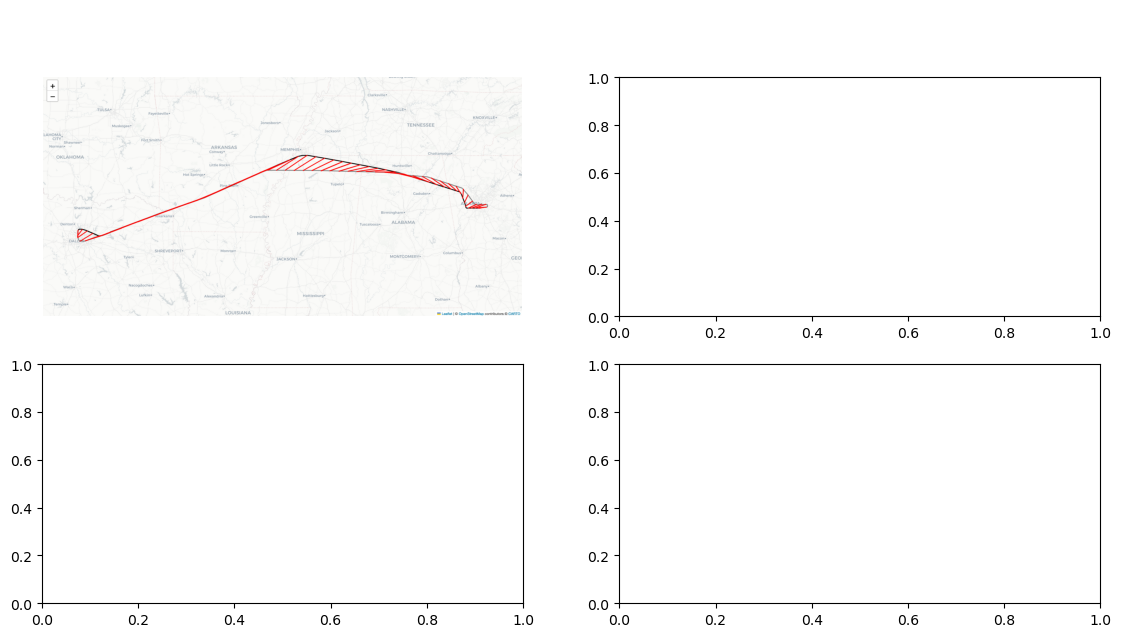

In [239]:
html_map_path, png_map_path = get_map_image(m, file_base = None, save_map_name = str(100), firefox_dir = None, firefox_binary = None)

fig, ax = png_path_to_fig(png_map_path, main_title=" ", num_rows=2, num_cols=2) 



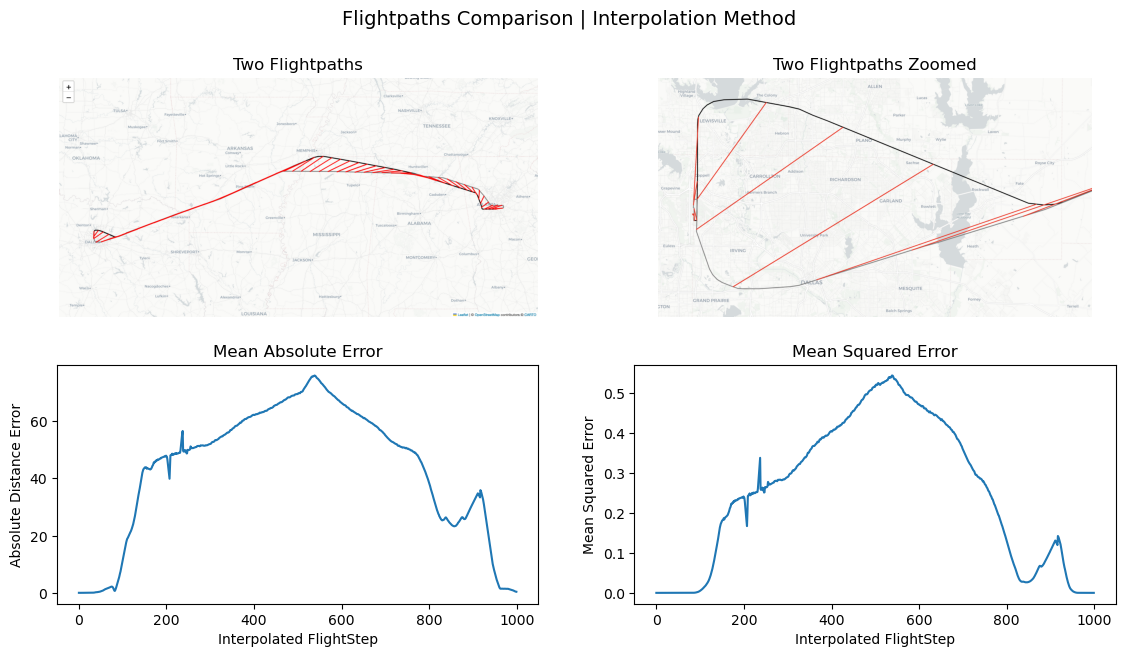

In [240]:
zoomed1_dir = "/Users/aleksandranikevich/Desktop/AircraftTrajectory/data/zoomed_images/zoomed1.png"
img_zoomed = mpimg.imread(zoomed1_dir)


fig.suptitle("Flightpaths Comparison | Interpolation Method", fontsize=14) #('Atlanta to Dallas Two Flight Paths Deviation Comparison', fontsize=16)

ax[0].set_title("Two Flightpaths")

ax[1].imshow(img_zoomed)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].set_title("Two Flightpaths Zoomed")



ax[2].plot(mae_error_arr)
ax[2].set_title("Mean Absolute Error")
ax[2].set_xlabel("Interpolated FlightStep")
ax[2].set_ylabel("Absolute Distance Error")


ax[3].plot(mse_error_arr)
ax[3].set_title("Mean Squared Error")
ax[3].set_xlabel("Interpolated FlightStep")
ax[3].set_ylabel("Mean Squared Error")

# for i, error_track in enumerate(error_tracks_list):
#     ax[1].plot(dist_flown_list, error_track, color=hex_colors[i])
# ax[1].set_title("Track Error")
# ax[1].set_xlabel("Distance Flown (Km)")
# ax[1].set_ylabel("Predicted Track Error (Km)")


# ax[1].title("Normalized Flighttime vs Absolute Eror")
# ax[1].xlabel("Normalized Flighttime")
# ax[1].ylabel("")
# ax[1].plot(mae_error_arr)

# ax[2].title("Normalized Flighttime vs Mean Squared Error")
# ax[3].plot(mse_error_arr)
fig

In [241]:
fig.savefig("/Users/aleksandranikevich/Desktop/AircraftTrajectory/data/overleaf_images/zoomed1.png")

In [242]:
np.amax(mae_error_arr)

75.87851928588384

In [111]:
mse_error_arr

[]

In [251]:
# DTW approach



flightpath_compleate_1 = flight_df_1[["Latitude", "Longitude"]].to_numpy()
flightpath_compleate_2 = flight_df_2[["Latitude", "Longitude"]].to_numpy()

distance, path = fastdtw(flightpath_compleate_1, flightpath_compleate_2, dist=euclidean)
##aligned_path = [(flightpath_compleate_1[i], flightpath_compleate_2[j]) for i, j in path]
aligned_path_1 = np.array([flightpath_compleate_1[i] for i, j in path])
aligned_path_2 = np.array([flightpath_compleate_2[j] for i, j in path])

min_lat, max_lat = np.min(aligned_path_1[:, 0]), np.max(aligned_path_1[:, 0])
min_long, max_long = np.min(aligned_path_1[:, 1]), np.max(aligned_path_1[:, 1])

m = create_folium_map(min_lat, min_long, max_lat, max_long, border_lat_prop=0.05, border_long_prop=0.05, tiles=None) #"Cartodb dark_matter")
folium.PolyLine(locations=aligned_path_1, color='black', weight=2.5, opacity=1).add_to(m)
folium.PolyLine(locations=aligned_path_2, color='black', weight=2.5, opacity=1).add_to(m)


num_rows, num_cols = aligned_path_1.shape
absolute_distance_errro_arr = []
mse_error_arr = []
for i in range(0, num_rows, 15):
    lat1 = aligned_path_1[i][0]
    long1 = aligned_path_1[i][1]
    lat2 = aligned_path_2[i][0]
    long2 = aligned_path_2[i][1]

    np_line = np.array([[lat1, long1], [lat2, long2]])
    folium.PolyLine(locations=np_line, color='red', weight=2.5, opacity=1).add_to(m)





m

In [254]:
flightpath_compleate_1 = flight_df_1[["Latitude", "Longitude"]].to_numpy()
flightpath_compleate_2 = flight_df_2[["Latitude", "Longitude"]].to_numpy()

distance, path = fastdtw(flightpath_compleate_1, flightpath_compleate_2, dist=euclidean)
##aligned_path = [(flightpath_compleate_1[i], flightpath_compleate_2[j]) for i, j in path]
aligned_path_1 = np.array([flightpath_compleate_1[i] for i, j in path])
aligned_path_2 = np.array([flightpath_compleate_2[j] for i, j in path])

min_lat, max_lat = np.min(aligned_path_1[:, 0]), np.max(aligned_path_1[:, 0])
min_long, max_long = np.min(aligned_path_1[:, 1]), np.max(aligned_path_1[:, 1])

m = create_folium_map(min_lat, min_long, max_lat, max_long, border_lat_prop=0.05, border_long_prop=0.05, tiles=None) #"Cartodb dark_matter")
folium.PolyLine(locations=aligned_path_1, color='black', weight=2.5, opacity=1).add_to(m)
folium.PolyLine(locations=aligned_path_2, color='black', weight=2.5, opacity=1).add_to(m)


num_rows, num_cols = aligned_path_1.shape
absolute_distance_errro_arr = []
mse_error_arr = []
for i in range(0, 43*15, 15):
    lat1 = aligned_path_1[i][0]
    long1 = aligned_path_1[i][1]
    lat2 = aligned_path_2[i][0]
    long2 = aligned_path_2[i][1]

    np_line = np.array([[lat1, long1], [lat2, long2]])
    folium.PolyLine(locations=np_line, color='red', weight=2.5, opacity=1).add_to(m)

m

In [252]:
650/15

43.333333333333336

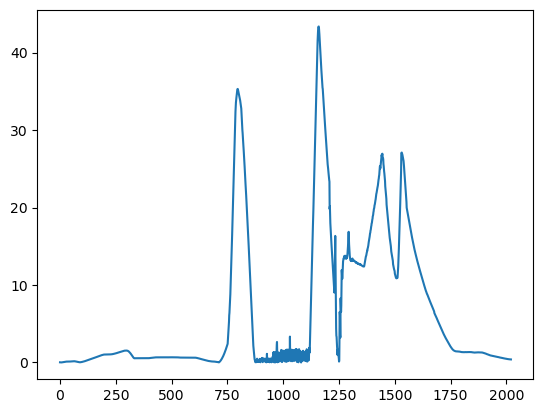

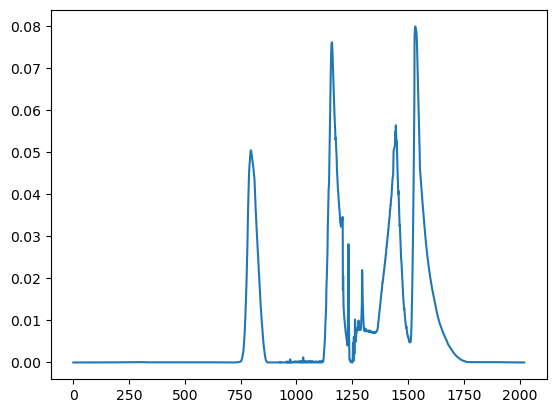

In [255]:

absolute_distance_errro_arr = []
mse_error_arr = []
for i in range(0, num_rows):
    lat1 = aligned_path_1[i][0]
    long1 = aligned_path_1[i][1]
    lat2 = aligned_path_2[i][0]
    long2 = aligned_path_2[i][1]

    distance = haversine(lat1, long1, lat2, long2)
    absolute_distance_errro_arr.append(distance)
    mse_error_arr.append(0.5* (lat1 - lat2)**2 + (long1 - long2)**2)

plt.figure()
plt.plot(absolute_distance_errro_arr)
plt.figure()
plt.plot(mse_error_arr)

In [250]:
absolute_distance_errro_arr

[0.02136354577319517,
 0.016838588130808435,
 0.007892833070600491,
 0.005171225644146833,
 0.0011119492665983002,
 0.0035766220603209178,
 0.007153243625909391,
 0.009590157058080877,
 0.016285864735345257,
 0.0203254997559332,
 0.021857210526676833,
 0.027475519860468846,
 0.03250454397593043,
 0.03596807208980735,
 0.041568724265894016,
 0.04586756929555943,
 0.050192377773426694,
 0.06796137519743284,
 0.06451489525918276,
 0.06797466102439664,
 0.07445107177636025,
 0.07614219901272179,
 0.077549015022334,
 0.08192651947035584,
 0.08815194792906861,
 0.09522347587396593,
 0.09960857495140889,
 0.10541728463578388,
 0.10982447764544959,
 0.11283970166530113,
 0.1127058252317532,
 0.12339376673729387,
 0.12099194425875506,
 0.12069149411801795,
 0.12227369825948786,
 0.12069486077319261,
 0.12126876449990309,
 0.12023992643195712,
 0.11816542580795847,
 0.11854192046027237,
 0.116438204297808,
 0.11912133859686448,
 0.12000728974844271,
 0.11958557505965482,
 0.1205766174716103,
 0.

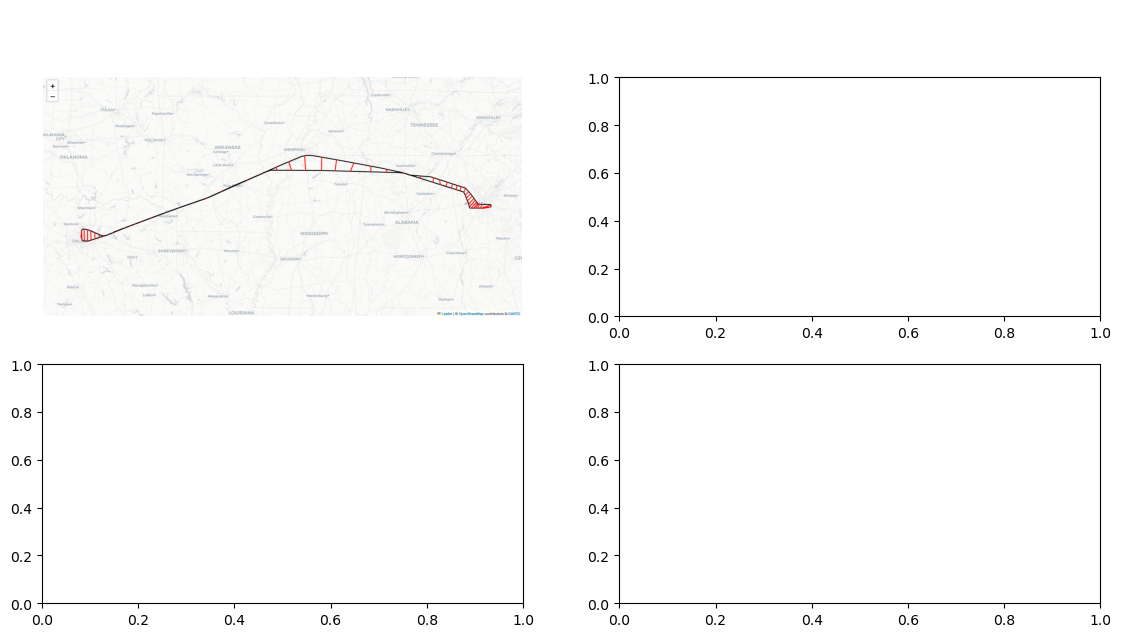

In [247]:
html_map_path, png_map_path = get_map_image(m, file_base = None, save_map_name = str(100), firefox_dir = None, firefox_binary = None)

fig, ax = png_path_to_fig(png_map_path, main_title=" ", num_rows=2, num_cols=2) 

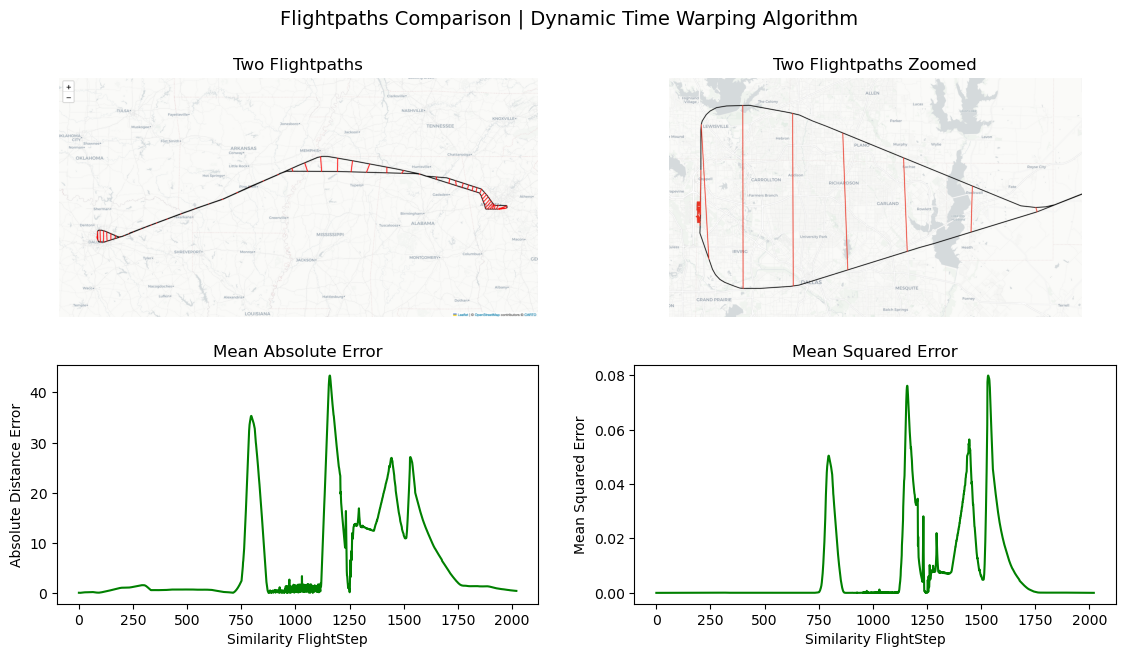

In [248]:
zoomed1_dir = "/Users/aleksandranikevich/Desktop/AircraftTrajectory/data/zoomed_images/zoomed2.png"
img_zoomed = mpimg.imread(zoomed1_dir)


fig.suptitle("Flightpaths Comparison | Dynamic Time Warping Algorithm", fontsize=14) #('Atlanta to Dallas Two Flight Paths Deviation Comparison', fontsize=16)

ax[0].set_title("Two Flightpaths")

ax[1].imshow(img_zoomed)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].set_title("Two Flightpaths Zoomed")



ax[2].plot(absolute_distance_errro_arr, color='green')
ax[2].set_title("Mean Absolute Error")
ax[2].set_xlabel("Similarity FlightStep")
ax[2].set_ylabel("Absolute Distance Error")


ax[3].plot(mse_error_arr, color='green')
ax[3].set_title("Mean Squared Error")
ax[3].set_xlabel("Similarity FlightStep")
ax[3].set_ylabel("Mean Squared Error")

# for i, error_track in enumerate(error_tracks_list):
#     ax[1].plot(dist_flown_list, error_track, color=hex_colors[i])
# ax[1].set_title("Track Error")
# ax[1].set_xlabel("Distance Flown (Km)")
# ax[1].set_ylabel("Predicted Track Error (Km)")


# ax[1].title("Normalized Flighttime vs Absolute Eror")
# ax[1].xlabel("Normalized Flighttime")
# ax[1].ylabel("")
# ax[1].plot(mae_error_arr)

# ax[2].title("Normalized Flighttime vs Mean Squared Error")
# ax[3].plot(mse_error_arr)
fig

In [249]:
np.amax(absolute_distance_errro_arr)

43.37066400068403

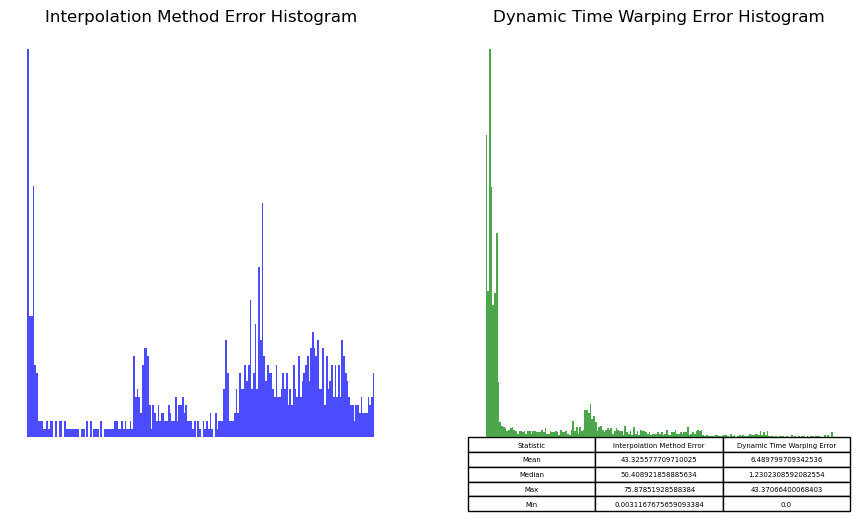

In [263]:
#mae_error_arr               # bad approach
#absolute_distance_errro_arr # good approach
absolute_distance_error_arr = absolute_distance_errro_arr

import matplotlib.pyplot as plt
import numpy as np

bins = 200

# # Example data
# mae_error_arr = np.random.rand(100)  # Replace with your actual data
# absolute_distance_error_arr = np.random.rand(100)  # Replace with your actual data

# Calculate statistics
mae_stats = [np.mean(mae_error_arr), np.median(mae_error_arr), np.max(mae_error_arr), np.min(mae_error_arr)]
absolute_distance_stats = [np.mean(absolute_distance_error_arr), np.median(absolute_distance_error_arr), np.max(absolute_distance_error_arr), np.min(absolute_distance_error_arr)]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot histograms
ax1.hist(mae_error_arr, bins=bins, color='blue', alpha=0.7)
ax1.set_title('Interpolation Method Error Histogram')
ax1.set_xlabel('Error')
ax1.set_ylabel('Frequency')

ax2.hist(absolute_distance_error_arr, bins=bins, color='green', alpha=0.7)
ax2.set_title('Dynamic Time Warping Error Histogram')
ax2.set_xlabel('Error')
ax2.set_ylabel('Frequency')

# Create table
table_data = [
    ['Mean', mae_stats[0], absolute_distance_stats[0]],
    ['Median', mae_stats[1], absolute_distance_stats[1]],
    ['Max', mae_stats[2], absolute_distance_stats[2]],
    ['Min', mae_stats[3], absolute_distance_stats[3]]
]

# Add table to the figure
table = plt.table(cellText=table_data, colLabels=['Statistic', 'Interpolation Method Error', 'Dynamic Time Warping Error'], loc='bottom', cellLoc='center')

# Adjust layout to make room for the table
plt.subplots_adjust(left=0.2, bottom=0.2)

# Hide axes for the table
ax1.axis('off')
ax2.axis('off')

plt.show()


# # Add table to the figure
# table = plt.table(cellText=table_data, colLabels=['Statistic', 'Interpolation Method Error', 'Dynamic Time Warping Error'], loc='bottom', cellLoc='center')

# # Adjust layout to make room for the table
# plt.subplots_adjust(left=0.1, bottom=0.3)

# # Make the table bigger and centered
# table.scale(1.5, 1.5)
# table.auto_set_font_size(False)
# table.set_fontsize(12)

# # Hide axes for the table
# ax1.axis('off')
# ax2.axis('off')

# plt.show()


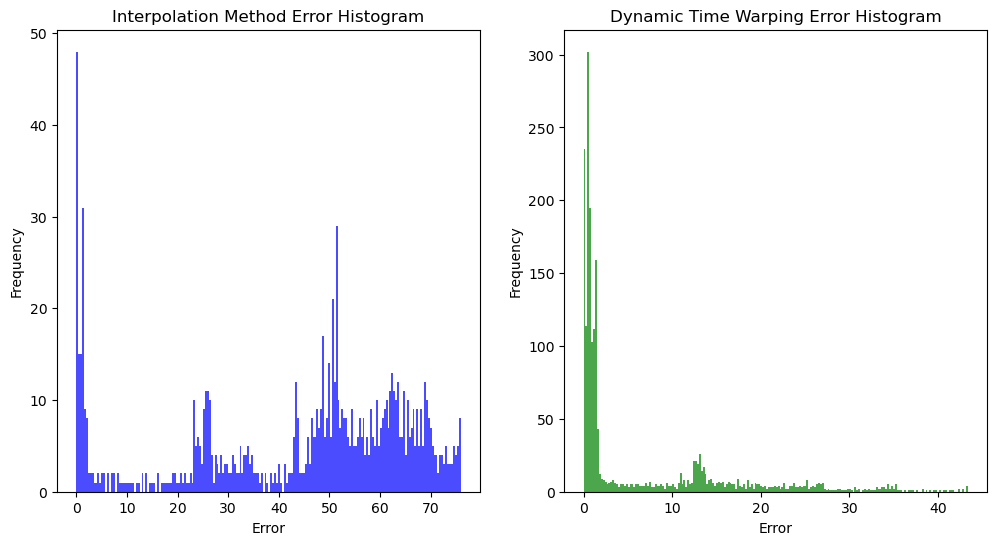

In [270]:
import matplotlib.pyplot as plt
import numpy as np

bins = 200


# Calculate statistics with limited decimal places
mae_stats = [round(np.mean(mae_error_arr), 3), round(np.median(mae_error_arr), 3), round(np.max(mae_error_arr), 3), round(np.min(mae_error_arr), 3)]
absolute_distance_stats = [round(np.mean(absolute_distance_error_arr), 3), round(np.median(absolute_distance_error_arr), 3), round(np.max(absolute_distance_error_arr), 3), round(np.min(absolute_distance_error_arr), 3)]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot histograms
ax1.hist(mae_error_arr, bins=bins, color='blue', alpha=0.7)
ax1.set_title('Interpolation Method Error Histogram')
ax1.set_xlabel('Error')
ax1.set_ylabel('Frequency')

ax2.hist(absolute_distance_error_arr, bins=bins, color='green', alpha=0.7)
ax2.set_title('Dynamic Time Warping Error Histogram')
ax2.set_xlabel('Error')
ax2.set_ylabel('Frequency')

# Create table
table_data = [
    ['Mean', mae_stats[0], absolute_distance_stats[0]],
    ['Median', mae_stats[1], absolute_distance_stats[1]],
    ['Max', mae_stats[2], absolute_distance_stats[2]],
    ['Min', mae_stats[3], absolute_distance_stats[3]]
]

# Add table to the figure
#table = plt.table(cellText=table_data, colLabels=['Statistic', 'Interpolation Method Error', 'Dynamic Time Warping Error'], loc='bottom', cellLoc='center')

# Adjust layout to make room for the table
#plt.subplots_adjust(left=0.2, bottom=0.3)

# Hide axes for the table
# ax1.axis('off')
# ax2.axis('off')

plt.show()


In [271]:
fig.savefig("/Users/aleksandranikevich/Desktop/AircraftTrajectory/data/overleaf_images/histogram.png")

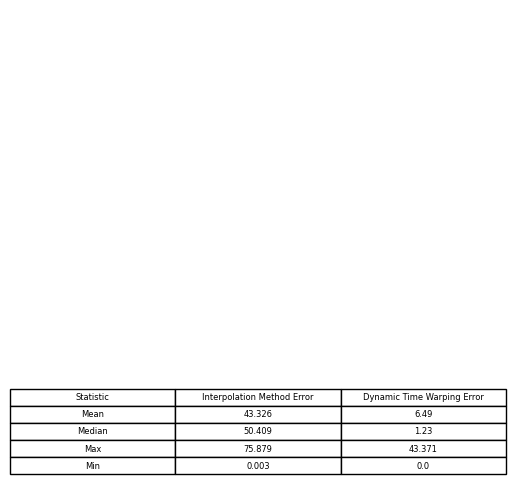

In [280]:
# Create a table
# fig, ax = plt.subplots()
# ax.axis('tight')
# ax.axis('off')

# table = ax.table(cellText=table_data, colLabels=['Statistic', 'Interpolation Method Error', 'Dynamic Time Warping Error'], loc='bottom', cellLoc='center')
# #table = ax.table(cellText=table_data, loc='center', cellLoc='center')

# # Display the table
# plt.tight_layout()
# plt.show()

fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=table_data, colLabels=['Statistic', 'Interpolation Method Error', 'Dynamic Time Warping Error'], loc='bottom', cellLoc='center')
#table = ax.table(cellText=table_data, loc='center', cellLoc='center')

# Adjust the layout to remove extra whitespace
plt.subplots_adjust(top=0.9)

# Display the table
plt.show()


fig.savefig("/Users/aleksandranikevich/Desktop/AircraftTrajectory/data/overleaf_images/table.png")

(-2.1685332000342017, 45.539197200718235, 0.0, 317.1)

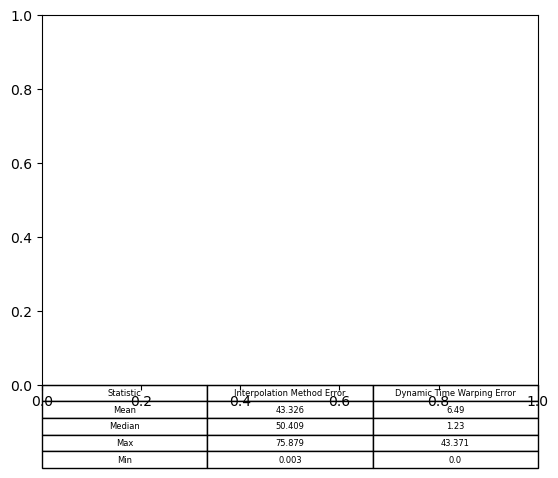

In [273]:
plt.figure()
plt.table(cellText=table_data, colLabels=['Statistic', 'Interpolation Method Error', 'Dynamic Time Warping Error'], loc='bottom', cellLoc='center')
ax1.axis('off')
ax2.axis('off')

In [107]:
aligned_path_1.shape

(2021, 2)

In [97]:
resampled_df1

,timestamp,Latitude,Longitude
0,0.000000,32.889860,-97.034430
1,0.001001,32.889953,-97.034399
2,0.002002,32.890061,-97.034330
3,0.003003,32.890157,-97.034400
4,0.004004,32.890204,-97.034416
...,...,...,...
995,0.995996,33.637835,-84.440459
996,0.996997,33.638220,-84.440471
997,0.997998,33.638394,-84.440490
998,0.998999,33.638549,-84.440490


In [95]:
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

# Example data
trajectory1 = np.array([[37.7749, -122.4194], [37.7750, -122.4195], [37.7751, -122.4196]])
trajectory2 = np.array([[37.7749, -122.4194], [37.7751, -122.4196], [37.7753, -122.4198]])

# Calculate DTW distance
distance, path = fastdtw(trajectory1, trajectory2, dist=euclidean)

# Convert path to lat-long coordinates
aligned_path = [(trajectory1[i], trajectory2[j]) for i, j in path]

# Print the aligned path
for coord1, coord2 in aligned_path:
    print(f"Trajectory1: {coord1}, Trajectory2: {coord2}")


Trajectory1: [  37.7749 -122.4194], Trajectory2: [  37.7749 -122.4194]
Trajectory1: [  37.775  -122.4195], Trajectory2: [  37.7749 -122.4194]
Trajectory1: [  37.7751 -122.4196], Trajectory2: [  37.7751 -122.4196]
Trajectory1: [  37.7751 -122.4196], Trajectory2: [  37.7753 -122.4198]


In [94]:
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

# Example data
trajectory1 = np.array([[37.7749, -122.4194], [37.7750, -122.4195], [37.7751, -122.4196]])
trajectory2 = np.array([[37.7749, -122.4194], [37.7751, -122.4196], [37.7753, -122.4198]])

# Calculate DTW distance
distance, path = fastdtw(trajectory1, trajectory2, dist=euclidean)
path


[(0, 0), (1, 0), (2, 1), (2, 2)]

In [78]:
mae_error_arr

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [58]:
copy_flight_df1 = deepcopy(flight_df_1) #['Time'][0]
copy_flight_df1['Time'] = copy_flight_df1['Time'] - copy_flight_df1['Time'][0]
copy_flight_df1

,Unnamed: 0,fltKey,CID,UAID,Time,Latitude,Longitude,Altitude,PointSource,RecTypeCat,Significance,GroundSpeed,FlightCourse
0,71245693,68627,778,DAL893,0,32.88986,-97.03443,5.69,0xE02,1,1,1,0
1,71245694,68627,778,DAL893,3,32.88988,-97.03443,5.69,0xE02,1,1,1,0
2,71245695,68627,778,DAL893,5,32.88992,-97.03439,5.69,0xE02,1,1,6,40
3,71245696,68627,778,DAL893,6,32.88995,-97.03440,5.69,0xE02,1,1,7,344
4,71245697,68627,778,DAL893,8,32.88997,-97.03439,5.69,0xE02,1,1,2,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,71247176,68627,778,DAL893,6273,33.63859,-84.44049,10.06,0xE02,1,1,6,0
1484,71247177,68627,778,DAL893,6274,33.63861,-84.44051,10.06,0xE02,1,1,6,320
1485,71247178,68627,778,DAL893,6275,33.63864,-84.44052,10.06,0xE02,1,1,7,344
1486,71247179,68627,778,DAL893,6276,33.63865,-84.44053,10.06,0xE02,1,10,3,320


In [67]:
copy_flight_df1['Time']

0          0
1          3
2          5
3          6
4          8
        ... 
1483    6273
1484    6274
1485    6275
1486    6276
1487    6278
Name: Time, Length: 1488, dtype: int64

In [69]:
copy_flight_df1['Time'].iloc[0], copy_flight_df1['Time'].iloc[-1]

(0, 6278)

In [55]:
flight_df_1 #['Time']

,Unnamed: 0,fltKey,CID,UAID,Time,Latitude,Longitude,Altitude,PointSource,RecTypeCat,Significance,GroundSpeed,FlightCourse
0,71245693,68627,778,DAL893,1715947300,32.88986,-97.03443,5.69,0xE02,1,1,1,0
1,71245694,68627,778,DAL893,1715947303,32.88988,-97.03443,5.69,0xE02,1,1,1,0
2,71245695,68627,778,DAL893,1715947305,32.88992,-97.03439,5.69,0xE02,1,1,6,40
3,71245696,68627,778,DAL893,1715947306,32.88995,-97.03440,5.69,0xE02,1,1,7,344
4,71245697,68627,778,DAL893,1715947308,32.88997,-97.03439,5.69,0xE02,1,1,2,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483,71247176,68627,778,DAL893,1715953573,33.63859,-84.44049,10.06,0xE02,1,1,6,0
1484,71247177,68627,778,DAL893,1715953574,33.63861,-84.44051,10.06,0xE02,1,1,6,320
1485,71247178,68627,778,DAL893,1715953575,33.63864,-84.44052,10.06,0xE02,1,1,7,344
1486,71247179,68627,778,DAL893,1715953576,33.63865,-84.44053,10.06,0xE02,1,10,3,320


In [51]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

# Example dataframes
df1 = pd.DataFrame({'timestamp': [0, 1, 2, 3], 'lat': [37.7749, 37.7750, 37.7751, 37.7752], 'long': [-122.4194, -122.4195, -122.4196, -122.4197]})
df2 = pd.DataFrame({'timestamp': [0, 1, 2, 3], 'lat': [37.7749, 37.7751, 37.7753, 37.7755], 'long': [-122.4194, -122.4196, -122.4198, -122.4200]})

# Common time grid
timestamps = np.linspace(0, 3, 100)

# Interpolation
interp1_lat = interp1d(df1['timestamp'], df1['lat'], kind='linear')
interp1_long = interp1d(df1['timestamp'], df1['long'], kind='linear')
interp2_lat = interp1d(df2['timestamp'], df2['lat'], kind='linear')
interp2_long = interp1d(df2['timestamp'], df2['long'], kind='linear')

resampled_df1 = pd.DataFrame({'timestamp': timestamps, 'lat': interp1_lat(timestamps), 'long': interp1_long(timestamps)})
resampled_df2 = pd.DataFrame({'timestamp': timestamps, 'lat': interp2_lat(timestamps), 'long': interp2_long(timestamps)})

# Calculating MAE
mae_lat = np.mean(np.abs(resampled_df1['lat'] - resampled_df2['lat']))
mae_long = np.mean(np.abs(resampled_df1['long'] - resampled_df2['long']))

print(f'MAE Latitude: {mae_lat}, MAE Longitude: {mae_long}')


MAE Latitude: 0.00015000000000142677, MAE Longitude: 0.00014999999999787406


In [50]:
import numpy as np
from frechetdist import frdist


# Calculate Frechet distance
distance = frdist(flightpath_compleate_2, flightpath_compleate_2)
print(f'Frechet distance: {distance}')


RecursionError: maximum recursion depth exceeded

In [46]:
flightpath_compleate_1.shape

(1488, 2)

In [45]:
np.array([[37.7749, -122.4194], [37.7750, -122.4195], [37.7751, -122.4196]]).shape

(3, 2)